# [NASA Fatigue Dataset](https://nasagov.app.box.com/s/dthnokybxvlh84yn1jl0emlqyw0i1kyz/folder/168445696896)

In [8]:
import numpy as np
import os
import mne
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [3]:
%load_ext autoreload
%autoreload 2
from MDFA import MDFA

In [4]:
NASA_dataset_root = '/Users/athenasaghi/Downloads/EEG'
files = os.listdir(NASA_dataset_root)
filtered_files = [file for file in files if 'BB' in file]
filtered_files,len(filtered_files)


(['2764BB',
  '2760BB',
  '2763BB',
  '2757BB',
  '2766BB',
  '2762BB',
  '2750BB',
  '2765BB',
  '2761BB'],
 9)

### Multifractal DFA on the all events of a signal

In [ ]:
scales = [16, 32, 64, 128, 256, 512, 1024]
# scales = np.linspace(16,2000,20).astype(int)
q =np.linspace(-10, 10, 20)
for fname in filtered_files:
  vhdr_file_path = os.path.join(NASA_dataset_root,f'{fname}/{fname}_D1.vhdr')
  raw = mne.io.read_raw_brainvision(vhdr_file_path, preload=True)
  signal, times = raw[:]
  mdfa = MDFA(signal,'A2',scales,q,True, 2, k=False,fname=fname)
  mdfa.MDFA_whole()

### Multifractal DFA on the length of K on each signal 
(only Sing. Dim. plot)

Participant ID: 2764BB
Extracting parameters from EEG/2764BB/2764BB_D1.vhdr...
Setting channel info structure...
Reading 0 ... 996549  =      0.000 ...  3986.196 secs...


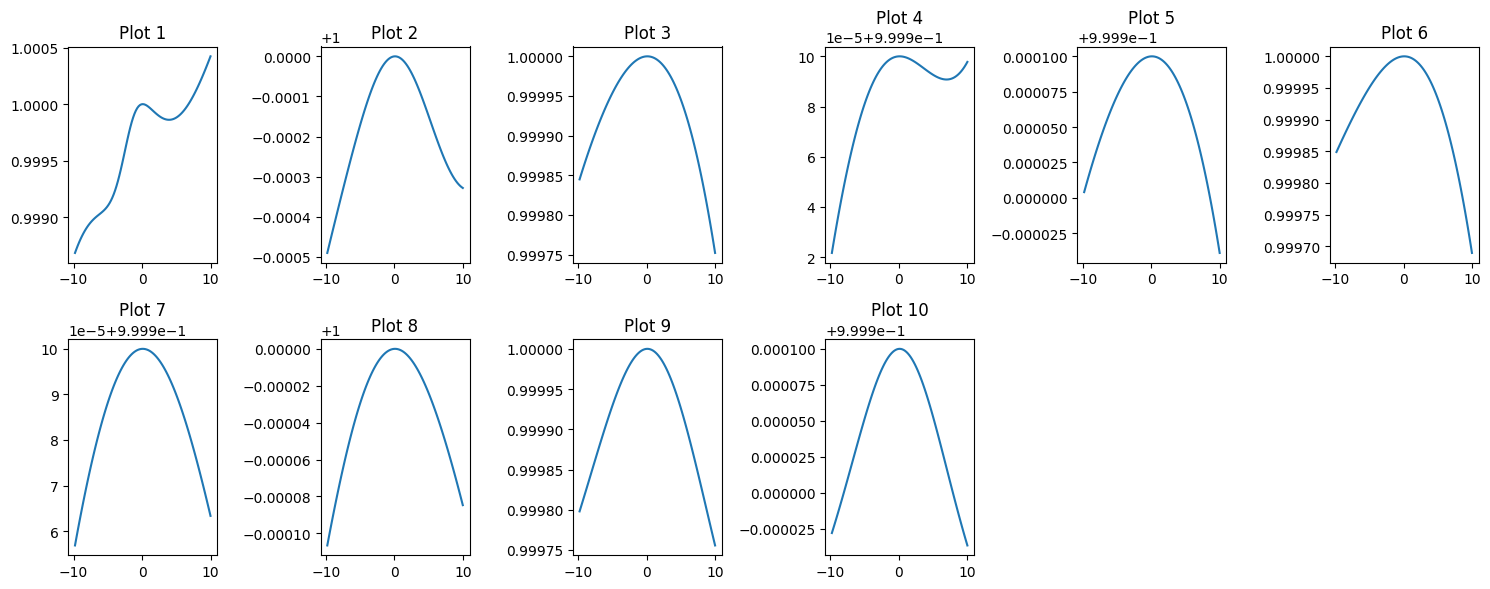

Participant ID: 2760BB
Extracting parameters from EEG/2760BB/2760BB_D1.vhdr...
Setting channel info structure...
Reading 0 ... 1083614  =      0.000 ...  4334.456 secs...


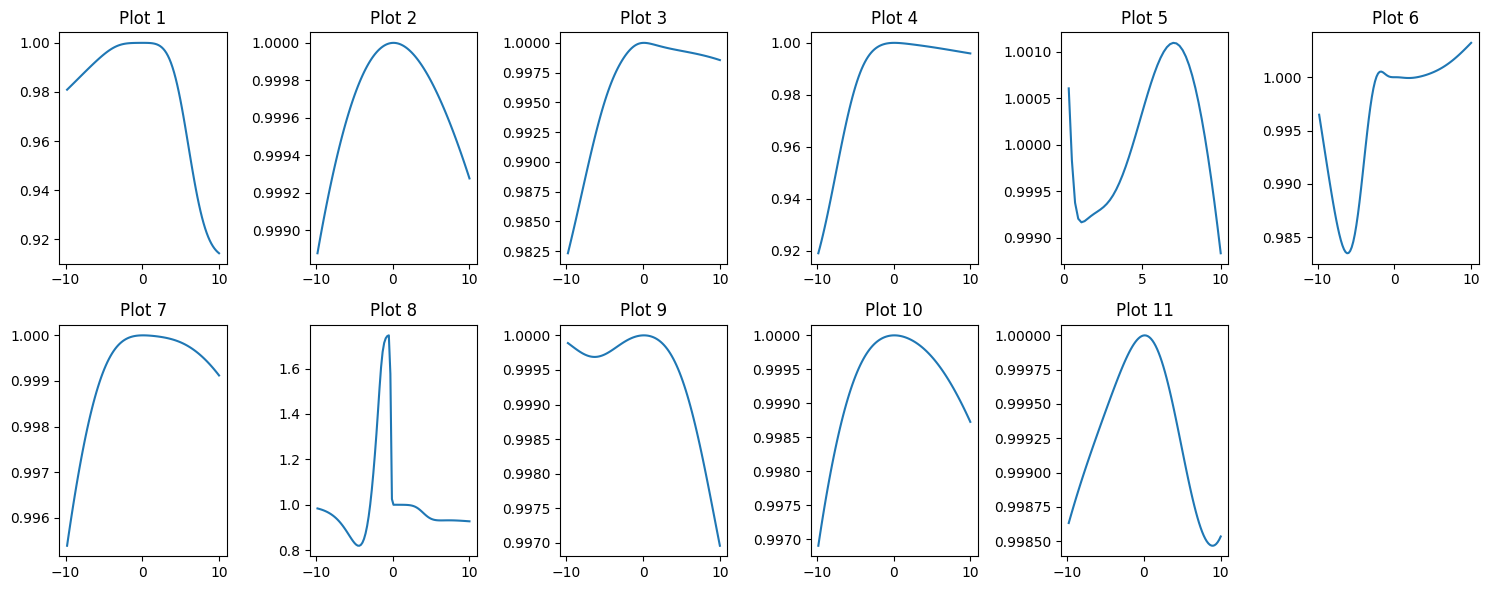

Participant ID: 2763BB
Extracting parameters from EEG/2763BB/2763BB_D1.vhdr...
Setting channel info structure...
Reading 0 ... 1134004  =      0.000 ...  4536.016 secs...


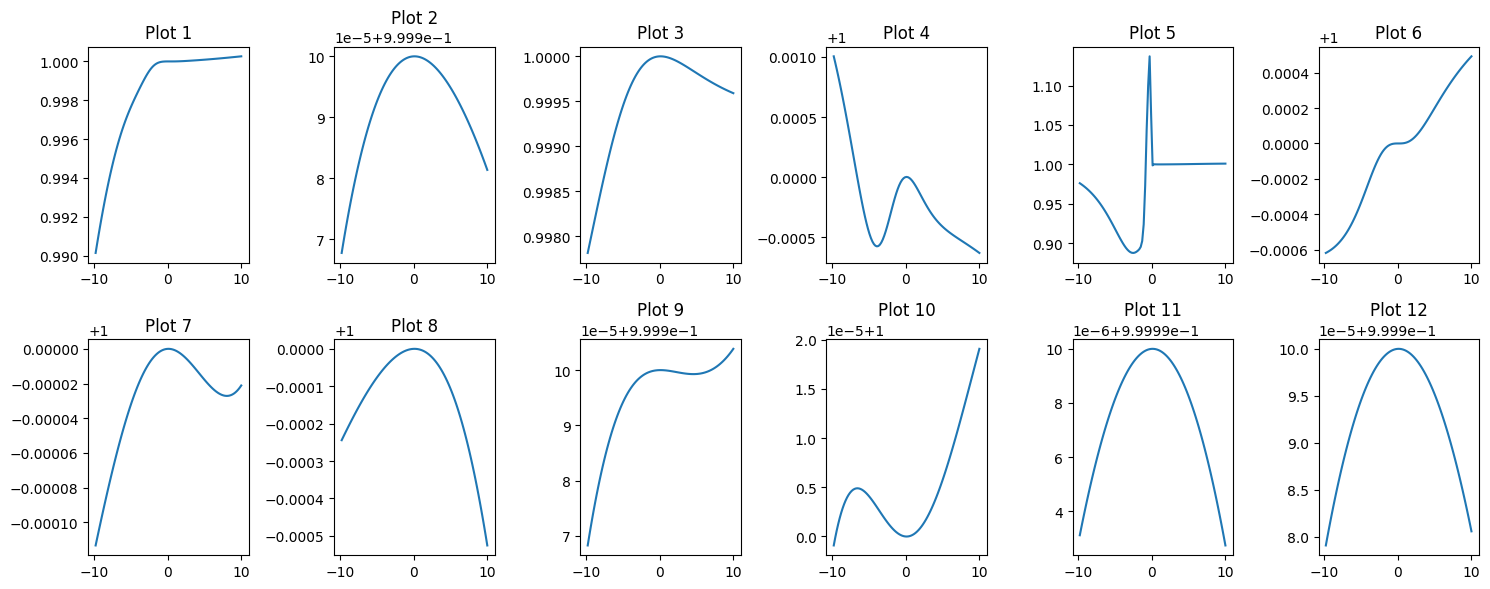

Participant ID: 2757BB
Extracting parameters from EEG/2757BB/2757BB_D1.vhdr...
Setting channel info structure...
Reading 0 ... 973039  =      0.000 ...  3892.156 secs...


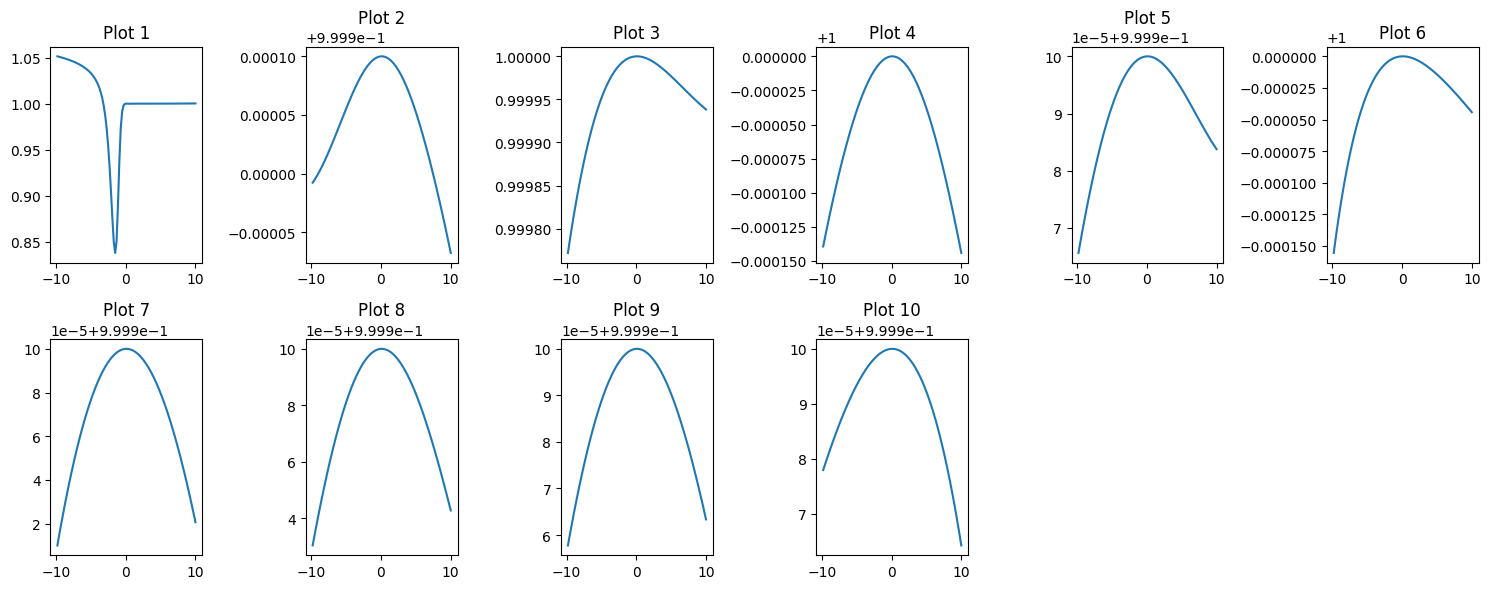

Participant ID: 2766BB
Extracting parameters from EEG/2766BB/2766BB_D1.vhdr...
Setting channel info structure...
Reading 0 ... 1011774  =      0.000 ...  4047.096 secs...


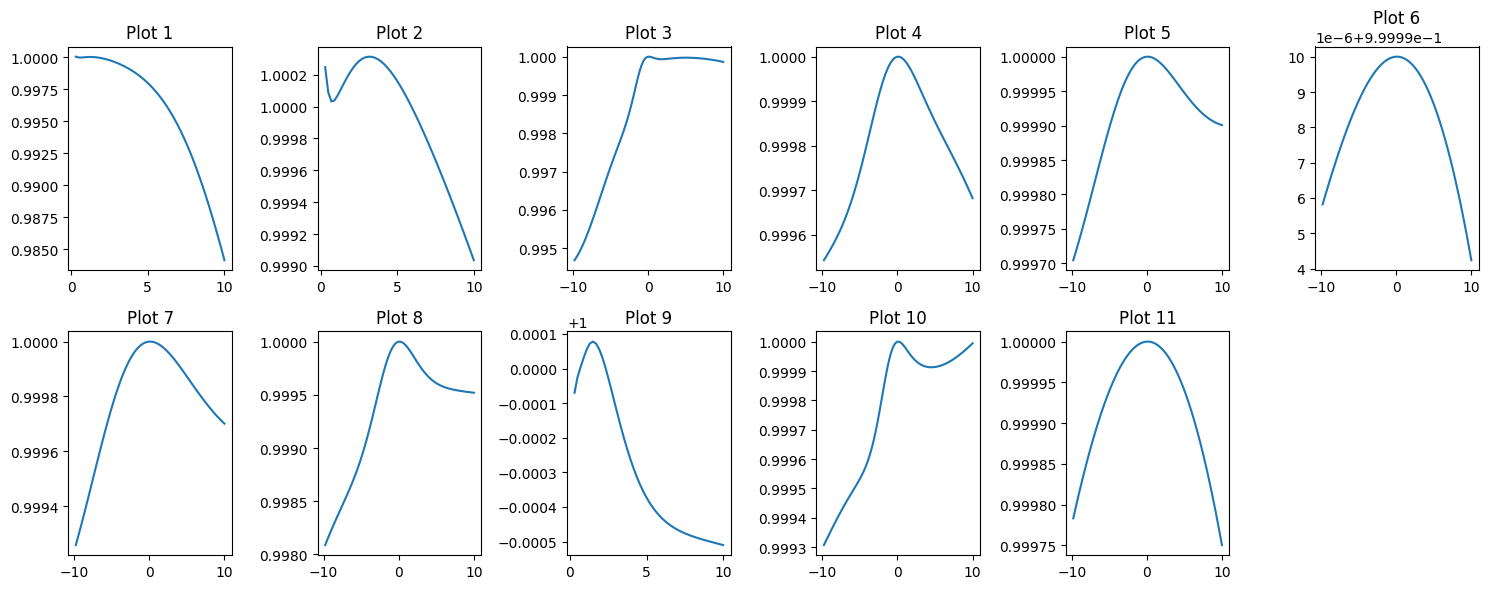

Participant ID: 2762BB
Extracting parameters from EEG/2762BB/2762BB_D1.vhdr...
Setting channel info structure...
Reading 0 ... 1241224  =      0.000 ...  4964.896 secs...


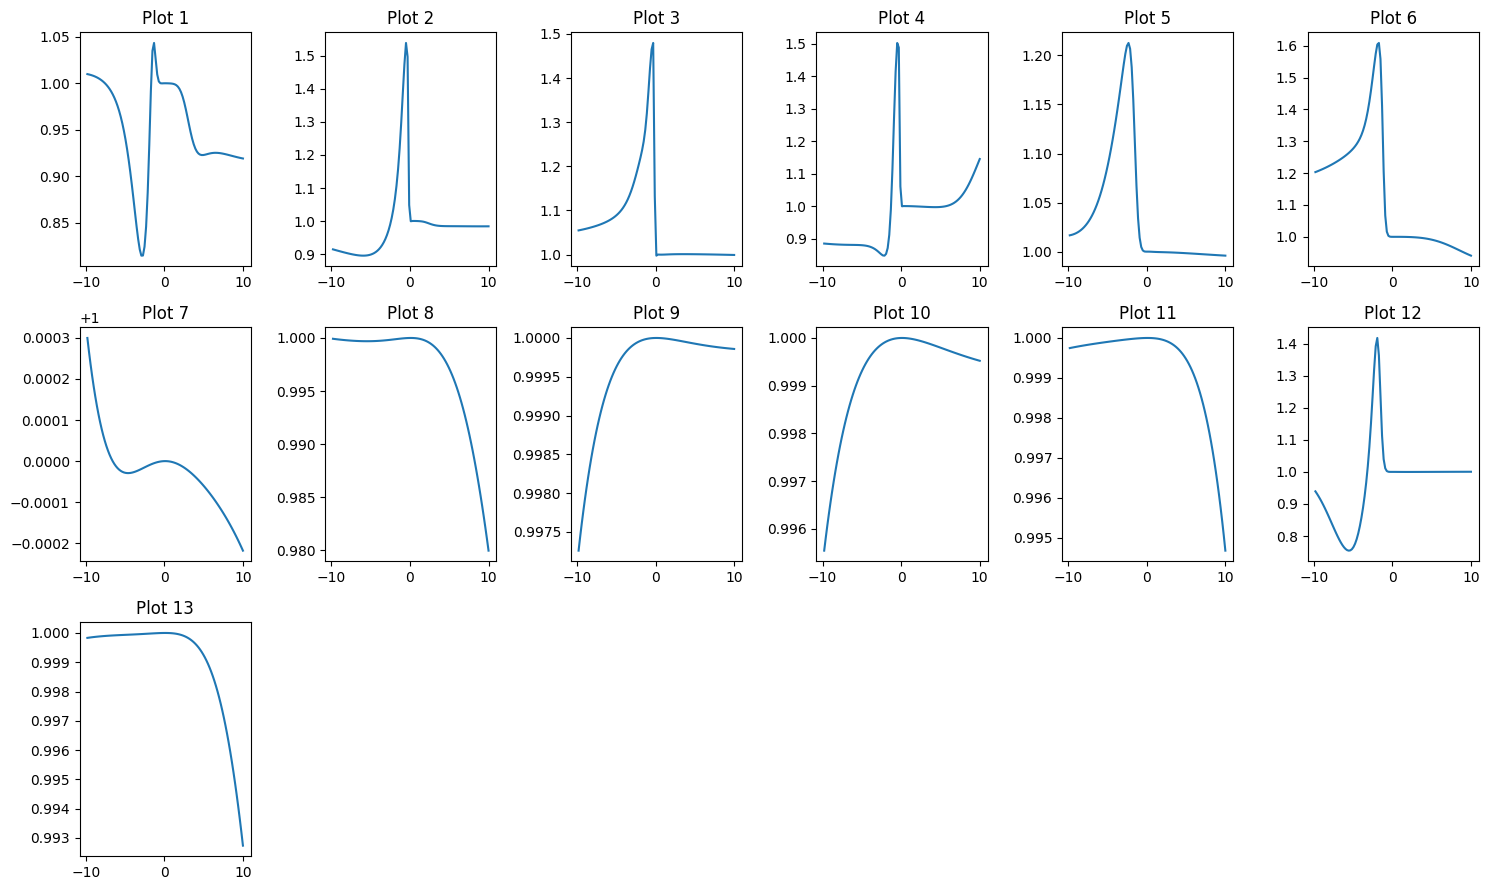

Participant ID: 2750BB
Extracting parameters from EEG/2750BB/2750BB_D1.vhdr...
Setting channel info structure...
Reading 0 ... 1102409  =      0.000 ...  4409.636 secs...


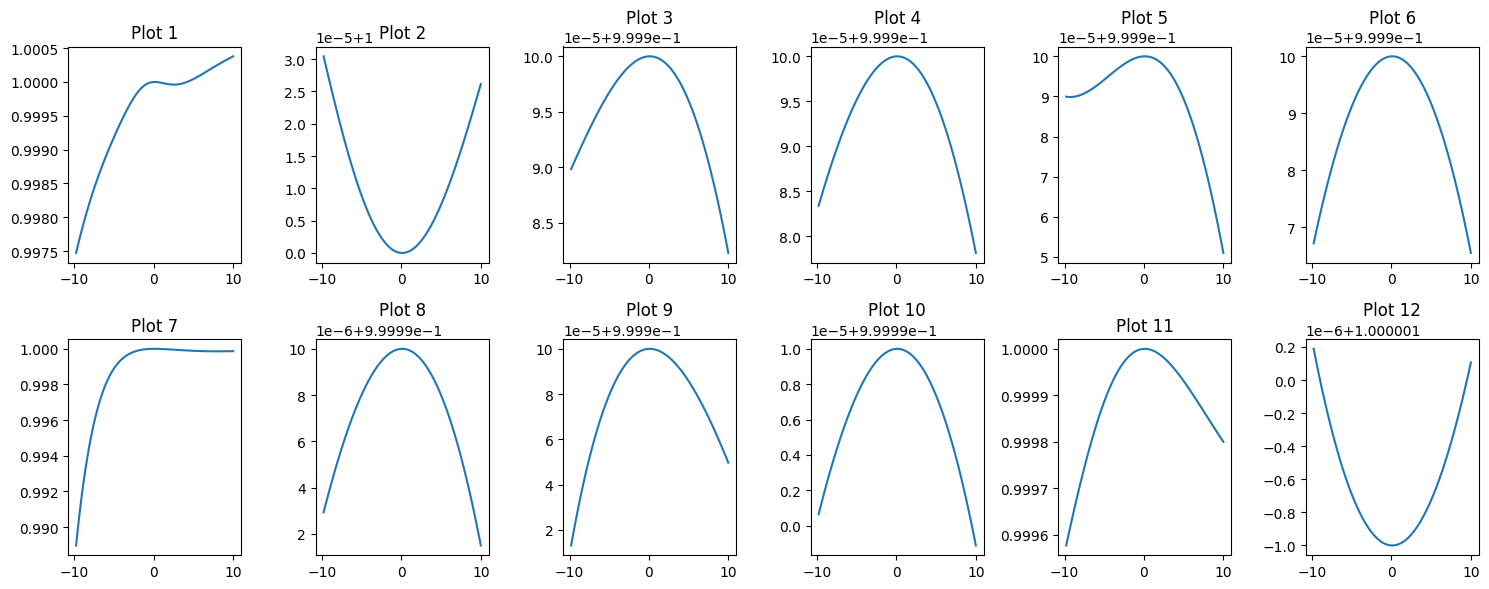

Participant ID: 2765BB
Extracting parameters from EEG/2765BB/2765BB_D1.vhdr...
Setting channel info structure...
Reading 0 ... 1200519  =      0.000 ...  4802.076 secs...


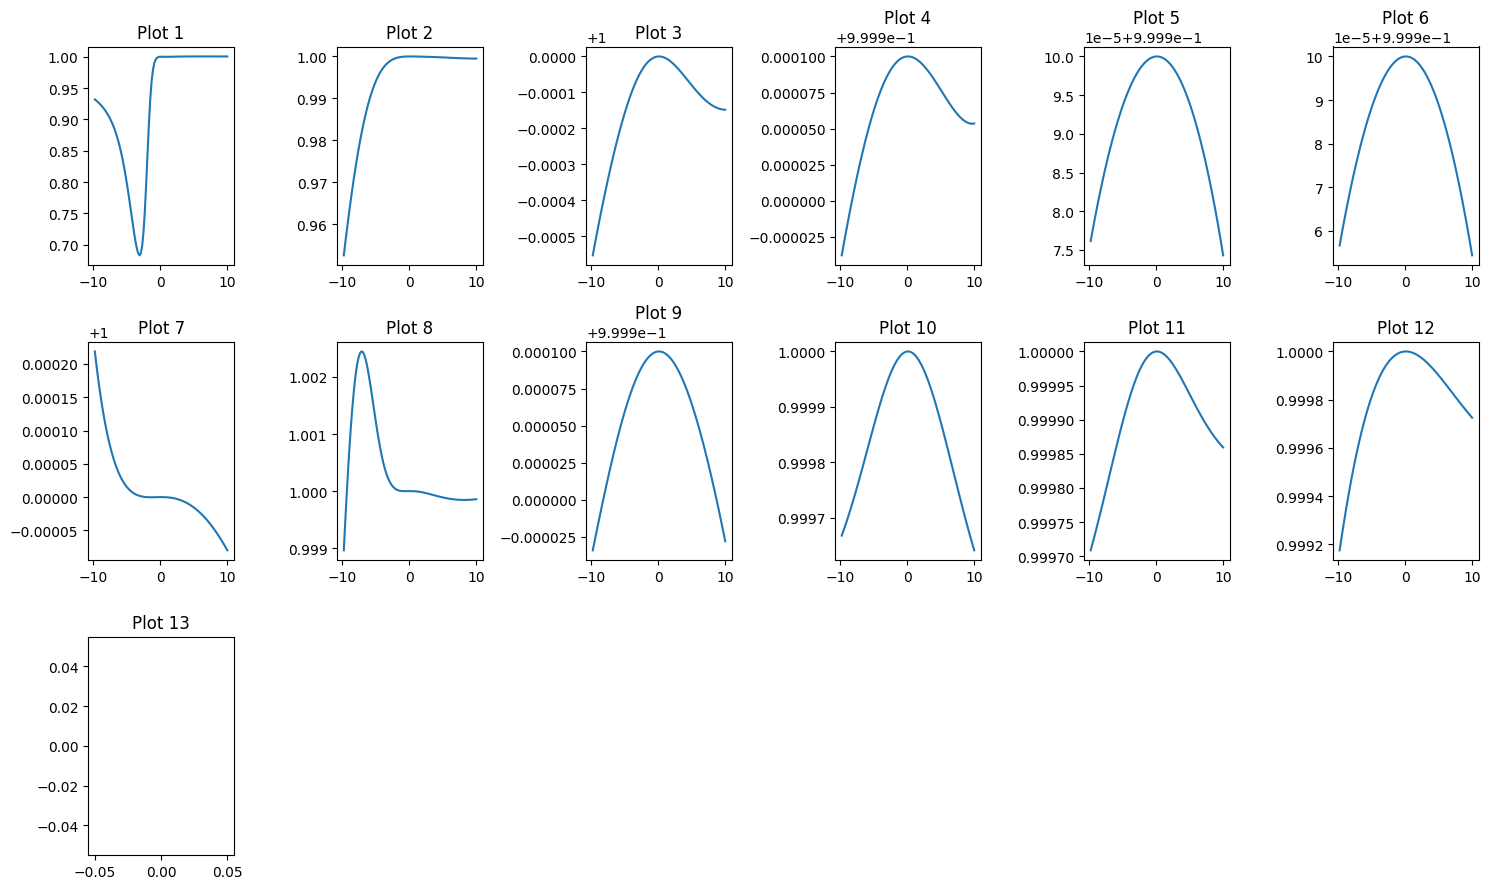

Participant ID: 2761BB
Extracting parameters from EEG/2761BB/2761BB_D1.vhdr...
Setting channel info structure...
Reading 0 ... 1054534  =      0.000 ...  4218.136 secs...


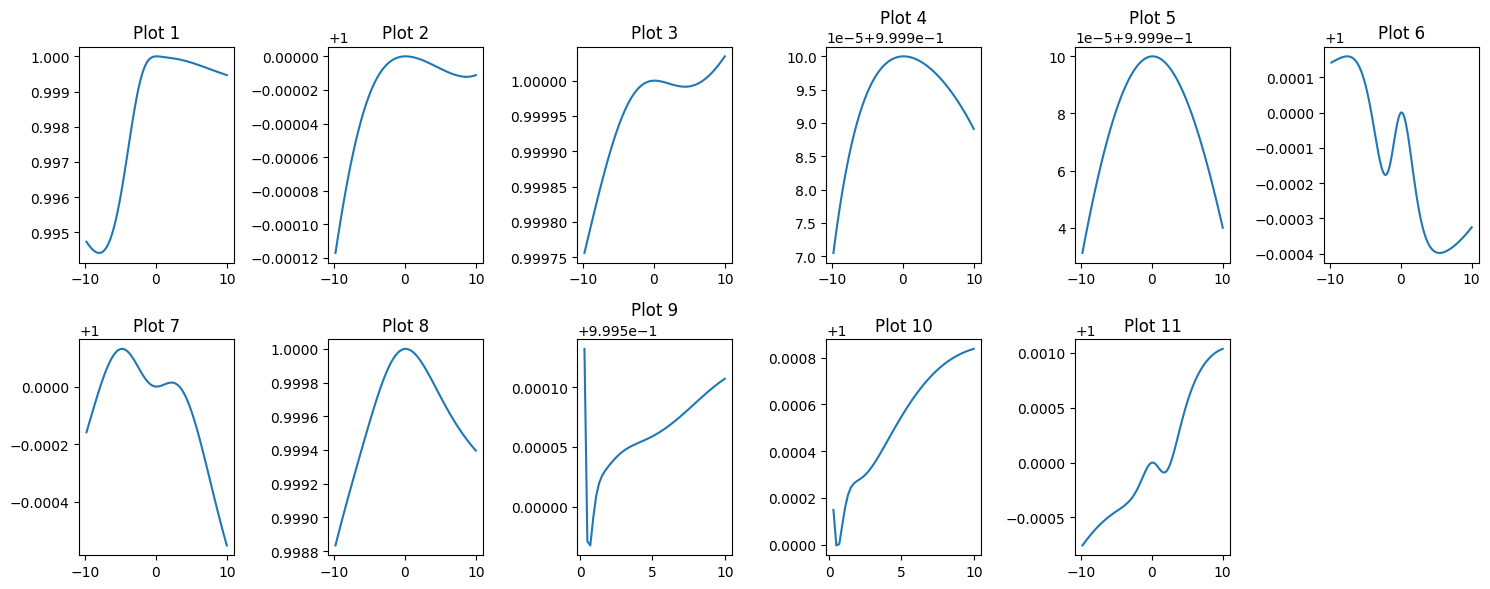

In [ ]:
scales = [16, 32, 64, 128, 256, 512, 1024]
q =np.linspace(-10, 10, 100)
for fname in filtered_files:
    print("Participant ID: {}".format(fname))
    vhdr_file_path = os.path.join(NASA_dataset_root,f'{fname}/{fname}_D1.vhdr')
    raw = mne.io.read_raw_brainvision(vhdr_file_path, preload=True)
    signal, times = raw[:]
    mdfa = MDFA(signal,'Cz',scales,q,False, 2, k=100000,fname=fname,dataset_name="NASA")
    # mdfa.MDFA_segments()
    

###  Wavelet Transform Modulus Maxima 

In [50]:
from cwt import *
import wt
gaus1 = pywt.ContinuousWavelet('gaus1')
gaus2 = pywt.ContinuousWavelet('gaus2')

In [ ]:
scales = [16, 32, 64, 128, 256, 512, 1024]
q =np.linspace(-10, 10, 100)
for fname in filtered_files:
    print("Participant ID: {}".format(fname))
    vhdr_file_path = os.path.join(NASA_dataset_root,f'{fname}/{fname}_D1.vhdr')
    raw = mne.io.read_raw_brainvision(vhdr_file_path, preload=True)
    signal, times = raw[:]
    # scales = np.arange(1, len(signal[0])/2)
    wtmm_trend, coefs_trend, ridges_trend = wtmm(signal[0][:200000], wavelet=gaus1, plot=True, remove_inf=True,order=1, proximity=10, scales=scales)

Extracting parameters from /Users/athenasaghi/Downloads/EEG/2764BB/2764BB_D1.vhdr...
Setting channel info structure...
Reading 0 ... 996549  =      0.000 ...  3986.196 secs...


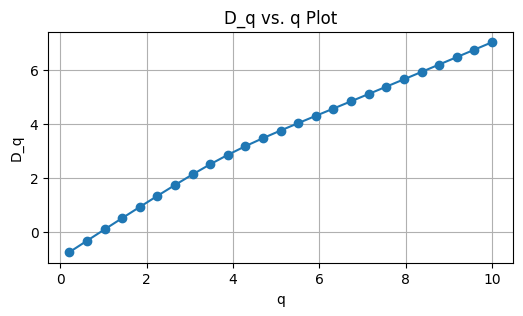

Extracting parameters from /Users/athenasaghi/Downloads/EEG/2760BB/2760BB_D1.vhdr...
Setting channel info structure...
Reading 0 ... 1083614  =      0.000 ...  4334.456 secs...


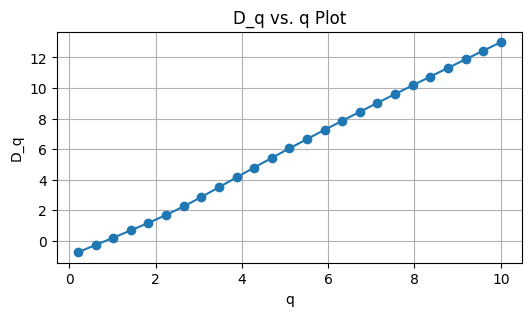

Extracting parameters from /Users/athenasaghi/Downloads/EEG/2763BB/2763BB_D1.vhdr...
Setting channel info structure...
Reading 0 ... 1134004  =      0.000 ...  4536.016 secs...


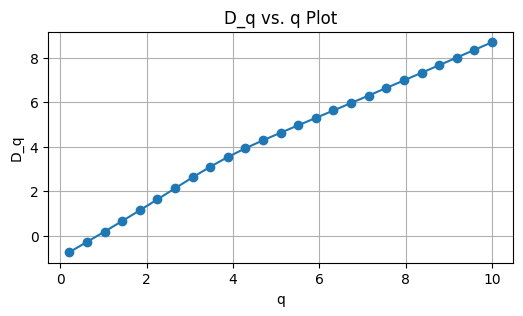

Extracting parameters from /Users/athenasaghi/Downloads/EEG/2757BB/2757BB_D1.vhdr...
Setting channel info structure...
Reading 0 ... 973039  =      0.000 ...  3892.156 secs...


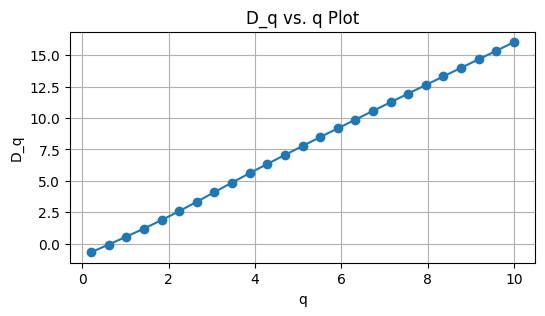

Extracting parameters from /Users/athenasaghi/Downloads/EEG/2766BB/2766BB_D1.vhdr...
Setting channel info structure...
Reading 0 ... 1011774  =      0.000 ...  4047.096 secs...


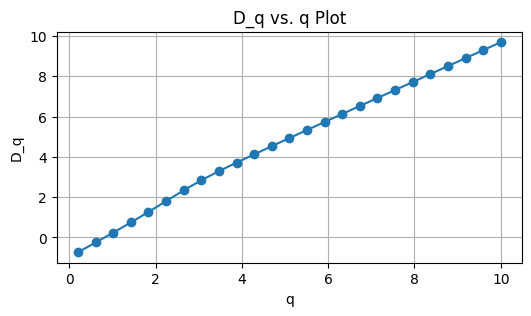

Extracting parameters from /Users/athenasaghi/Downloads/EEG/2762BB/2762BB_D1.vhdr...
Setting channel info structure...
Reading 0 ... 1241224  =      0.000 ...  4964.896 secs...


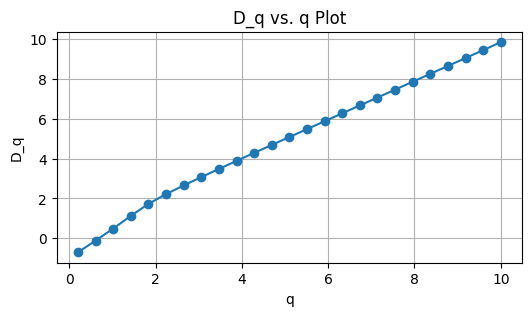

Extracting parameters from /Users/athenasaghi/Downloads/EEG/2750BB/2750BB_D1.vhdr...
Setting channel info structure...
Reading 0 ... 1102409  =      0.000 ...  4409.636 secs...


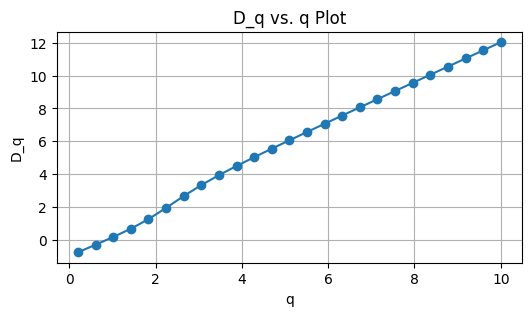

Extracting parameters from /Users/athenasaghi/Downloads/EEG/2765BB/2765BB_D1.vhdr...
Setting channel info structure...
Reading 0 ... 1200519  =      0.000 ...  4802.076 secs...


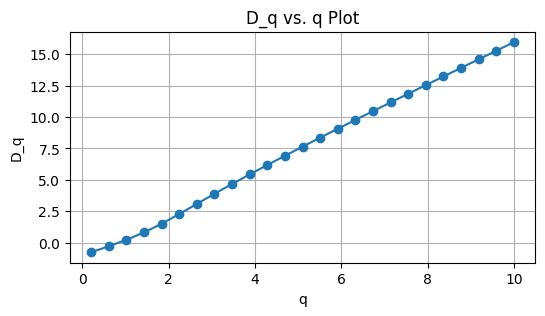

Extracting parameters from /Users/athenasaghi/Downloads/EEG/2761BB/2761BB_D1.vhdr...
Setting channel info structure...
Reading 0 ... 1054534  =      0.000 ...  4218.136 secs...


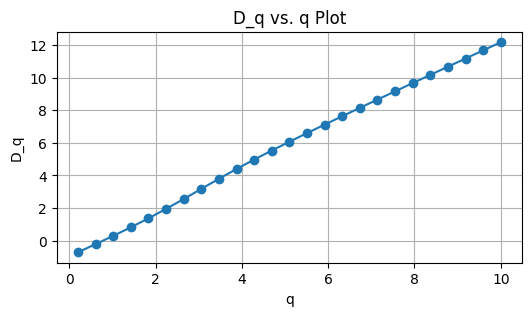

In [10]:
from MFDFA import MFDFA 
q =np.linspace(-10, 10, 50)

lag = np.unique(np.logspace(0.5, 3, 100).astype(int))
for fname in filtered_files:
    vhdr_file_path = os.path.join(NASA_dataset_root,f'{fname}/{fname}_D1.vhdr')
    raw = mne.io.read_raw_brainvision(vhdr_file_path, preload=True)
    signal, times = raw[:]
    lag , dfa =  MFDFA(signal[0], lag = lag, q = q, order = 2)
    Dq = []
    for i, qi in enumerate(q):
        Hq = np.polyfit(np.log(lag), np.log(dfa[:, i]), 1)[0]
        Dq.append(Hq * qi - 1)
    
    plt.figure(figsize=(6, 3))
    plt.plot(q, Dq, 'o-')
    plt.title('D_q vs. q Plot')
    plt.xlabel('q')
    plt.ylabel('D_q')
    plt.grid(True)
    plt.show()


Extracting parameters from /Users/athenasaghi/Downloads/EEG/2750BB/2750BB_D1.vhdr...
Setting channel info structure...
Reading 0 ... 1102409  =      0.000 ...  4409.636 secs...
